In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [4]:
stock_symbol='NFLX'
start_date="2020-01-01"
end_date="2024-01-01"

data=yf.download(stock_symbol,start=start_date,end=end_date)
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open   Volume
Ticker            NFLX        NFLX        NFLX        NFLX     NFLX
Date                                                               
2020-01-02  329.809998  329.980011  324.779999  326.100006  4485800
2020-01-03  325.899994  329.859985  325.529999  326.779999  3806900
2020-01-06  335.829987  336.359985  321.200012  323.119995  5663100
2020-01-07  330.750000  336.700012  330.299988  336.470001  4703200
2020-01-08  339.260010  342.700012  331.049988  331.489990  7104500


Price   Ticker
Close   NFLX      0
High    NFLX      0
Low     NFLX      0
Open    NFLX      0
Volume  NFLX      0
dtype: int64


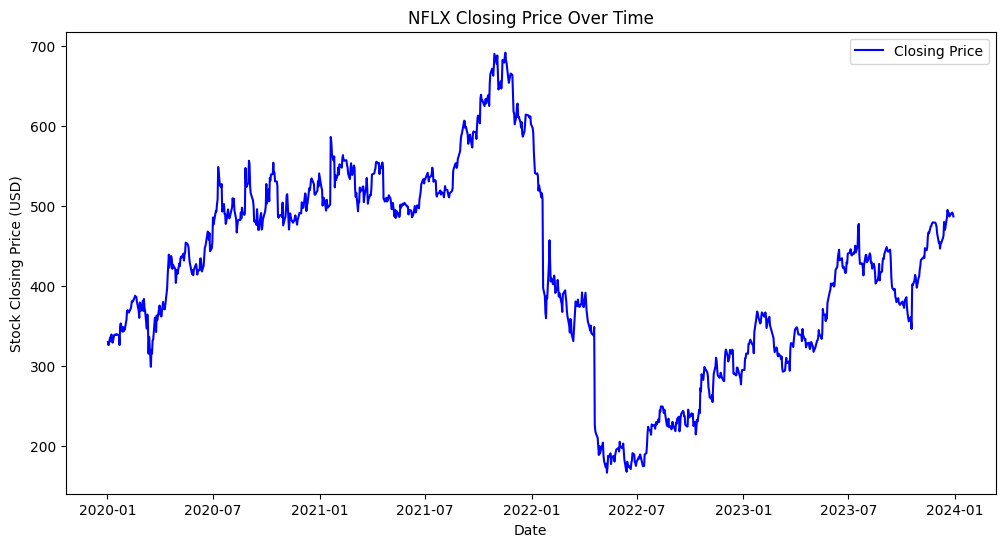

Ticker         NFLX
count   1006.000000
mean     420.203350
std      120.829682
min      166.369995
25%      337.589996
50%      428.304993
75%      509.102486
max      691.690002


In [5]:
print(data.isnull().sum())

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Closing Price', color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Closing Price (USD)")
plt.title(f"{stock_symbol} Closing Price Over Time")
plt.legend()
plt.show()

print(data['Close'].describe())

In [9]:
closing_prices = data[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices)


def create_sequences(data, time_steps=100):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])  
        y.append(data[i+time_steps])    
    return np.array(X), np.array(y)

time_steps = 100
X, y = create_sequences(closing_prices_scaled, time_steps)

print("Shape of X:", X.shape)  
print("Shape of y:", y.shape)  
print(X)

Shape of X: (906, 100, 1)
Shape of y: (906, 1)
[[[0.31112465]
  [0.30368156]
  [0.32258431]
  ...
  [0.51374401]
  [0.50055206]
  [0.47285462]]

 [[0.30368156]
  [0.32258431]
  [0.31291404]
  ...
  [0.50055206]
  [0.47285462]
  [0.48260111]]

 [[0.32258431]
  [0.31291404]
  [0.32911371]
  ...
  [0.47285462]
  [0.48260111]
  [0.47032286]]

 ...

 [[0.50489227]
  [0.52232927]
  [0.51764637]
  ...
  [0.61912736]
  [0.60989494]
  [0.61832788]]

 [[0.52232927]
  [0.51764637]
  [0.49975252]
  ...
  [0.60989494]
  [0.61832788]
  [0.61947005]]

 [[0.51764637]
  [0.49975252]
  [0.50180844]
  ...
  [0.61832788]
  [0.61947005]
  [0.61703345]]]


In [11]:
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print( X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)


(724, 100, 1) (724, 1)
(182, 100, 1) (182, 1)


In [ ]:

model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),  
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25), 
    Dense(units=1)   ])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - loss: 0.1235 - val_loss: 0.0024
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0132 - val_loss: 0.0019
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0077 - val_loss: 0.0022
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 0.0051 - val_loss: 0.0018
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.0060 - val_loss: 0.0018
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 0.0058 - val_loss: 0.0017
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0047 - val_loss: 0.0016
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0048 - val_loss: 0.0016
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.0050 - val_loss: 0.0030
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0051 - val_loss: 0.0024
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0041 - val_loss: 0.0014
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step


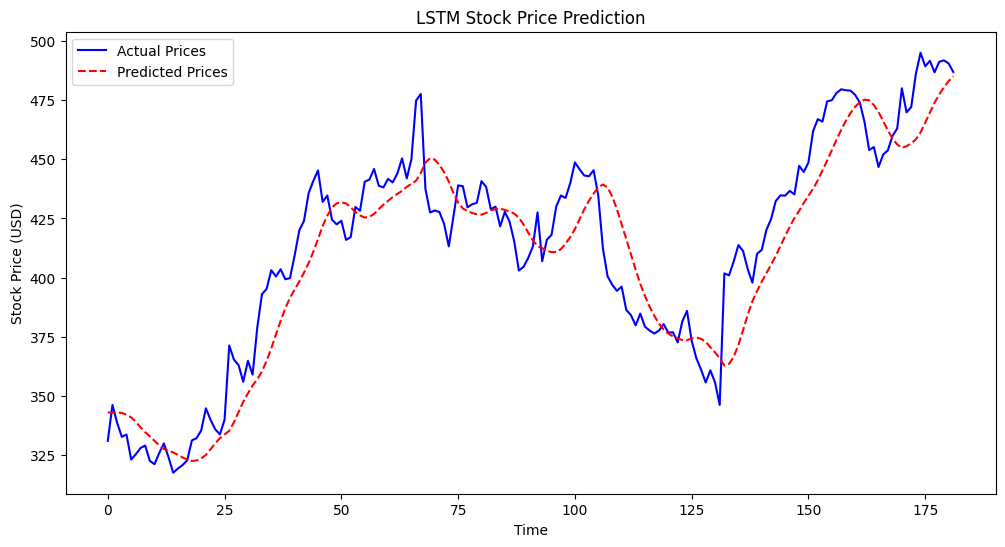

In [18]:
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))


plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Prices", color='blue')
plt.plot(y_pred_rescaled, label="Predicted Prices", color='red', linestyle='dashed')
plt.xlabel("Time")
plt.ylabel("Stock Price (USD)")
plt.title("LSTM Stock Price Prediction")
plt.legend()
plt.show()


In [19]:
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 313.65995964992817
Root Mean Squared Error (RMSE): 17.710447754078047


In [22]:
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)

rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 14.74
Mean Squared Error (MSE): 313.66
Root Mean Squared Error (RMSE): 17.71
